# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

NOMES:
* Leon Martins Uchoa Barboza

Este _notebook_ é correspondente ao nosso segundo projeto, passado no dia 19/09/2024 e para entrega no dia 17/10/2024. Ele consiste em resolver um problema prático e responder a duas questões teóricas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um _upload_ deste _notebook_, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente e que eu conseguir executar o código de vocês sem dificuldades.

O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito.

# Parte teórica

## Exercício 01

O objetivo dessa questão é estudar um pouco da *Maldição da Dimensionalidade* (https://en.wikipedia.org/wiki/Curse_of_dimensionality). De modo mais concreto, queremos estudar a seguinte afirmação, de ordem um pouco esotética:

*À medida que $p$ cresce, o volume do hipercubo $\mathbb{H}^p = [0, 1]^p$ fica cada vez mais concentrado em sua "casca" do que em seu interior.*

Para isso, faça o que se pede abaixo.

a) Apesar de esotérica, fazer a prova de tal afirmação é bastante simples! Seja $\mathbb{H}^p_{\varepsilon}$ o hipercubo contido em $\mathbb{H}^p$ obtido removendo-se uma "gordurinha" de tamanho $\varepsilon$ de sua beirada, ou seja, $\mathbb{H}^p_{\varepsilon} = [\varepsilon/2, 1 - \varepsilon/2]^p$. Mostre que o volume de $\mathbb{H}^p_{\varepsilon}$ converge para zero, para todo $\varepsilon > 0$, quando $p \to \infty$.

b) Particularmente, para mim essa demonstação não me ajuda a ter nenhuma intuição sobre o resultado, e ele continua sendo esotérico! Porém, um dia tive uma revelação divina que cá partilho com vocês. Fixe algum valor de $0 < \varepsilon < 1$ à sua escolha e simule $n$ vetores de tamanho $p$ de observações de uma variável aleatória uniforme no intervalo $[0, 1]$. Qual é a proporção desses vetores que não têm nenhuma observação fora do hipercubo $\mathbb{H}^p_{\varepsilon}$? Faça uma explicação, baseada em tal experimento, para justificar empiricamente o resultado que você provou no item a).

## Exercício 02

O objetivo dessa questão é provar o que foi exibido sobre a maldição da dimensionalidade ao final da aula 4. Considere um conjunto de dados artificial de $n$ observações, onde cada observação consiste de um vetor de $p$ atributos, sendo cada entrada uniformemente distribuída em $(0, 1)$. Chamaremos tal conjunto de dados de $\mathbb{X}$. Sejam $\mathbf{X}^{(i)}$ e $\mathbf{X}^{(j)}$ duas linhas distintas da matriz $\mathbb{X}$, ou seja, dois vetores independentes de observações, ambos de tamanho $p$, consistindo de entradas independentes e identicamente distribuídas com distribuição uniforme no intervalo $(0, 1)$, estude o que acontece com a quantidade abaixo, chamada de *coeficiente de variação* à medida que $p \to \infty$:

\begin{equation*}
\frac{\sqrt{\mathbb{V}\left(\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right)}}{\mathbb{E}\left[\left\|\mathbf{X}^{(i)} - \mathbf{X}^{(j)}\right\|^2\right]}.
\end{equation*}

Relacione esse resultado com o comportamento apresentado nos *slides* da aula 4.

# Parte prática

O objetivo da parte prática é analisar uma base de dados contendo informações sobre corridas de Uber, e tentar prever o valor da corrida com base em atributos de interesse. A base de dados encontra-se disponível [aqui](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).

O arquivo `.csv` tem poucas colunas: `fare_amount` é a coluna que desejamos prever, e temos também as colunas abaixo para usar como preditoras:
* `key` - _a unique identifier for each trip_
* `pickup_datetime` - _date and time when the meter was engaged_
* `passenger_count` - _the number of passengers in the vehicle (driver entered value)_
* `pickup_longitude` - _the longitude where the meter was engaged_
* `pickup_latitude` - _the latitude where the meter was engaged_
* `dropoff_longitude` - _the longitude where the meter was disengaged_
* `dropoff_latitude` - _the latitude where the meter was disengaged_

Note que a coluna `key` não será um preditor, já que contém somente uma variável de identificação da corrida. Porém, para que as outras colunas sejam propriamente utilizadas como preditoras, talvez seja necessário algum pré-processamento:
* Precisaremos converter as informações de latitude e longitude em distância ou nossos algoritmos serão capazes de fazê-lo "automaticamente"? Mesmo caso o façam, ter a distância logo de cara auxilia no processo de previsão?
* A coluna `pickup_datetime` tem muita informação útil, e pode ser convertida em muitas outras informações para te auxiliar na predição, por exemplo: dia da semana da corrida, se é feriado ou não, etc... porém, essas informações não são imediatas e vão requerer um certo "trabalho sujo" da sua parte, bem como um tico de ferramentas de processamento de texto :-)
* Note que, ao converter `pickup_datetime` para, digamos, dia da semana, será necessário converter essa informação em algo numérico. Aplicar `One Hot Encoding` é uma boa opção? Estude isso com carinho.

Alguns pontos que o seu trabalho deve conter:
* Análise exploratória bem aprofundada e interpretada: os nossos dados são muito interpretáveis! Além de fazer o que já esperamos (estudar correlações, visualizar histogramas, etc.), sua análise exploratória deve ser esclarecedora sobre distância entre ponto de partida e ponto de chegada, distribuição das corridas ao longo dos dias da semana, distribuição das corridas ao longo dos meses, estudar como (potencialmente) os atributos se relacionam com a resposta (sem e com pré-processamento), analisar (possível) influência do número de passageiros no preço da corrida, etc... Portanto, não basta fazer meia dúzia de gráficos para "cumprir tabela"! A análise exploratória deve informar muito sobre a base de dados e guiar os próximos passos!
* Criação de novos atributos a partir das colunas já presentes na base
* Treinamento e validação de todos os modelos de regressão que vimos até o momento, juntamente com uma interpretação de seus resultados
* Em particular, os coeficientes das regressões paramétricas devem ser interpretados, bem como a `feature_importance_` dos modelos baseados em árvores.
* Decisão de um "melhor" modelo para realizar previsões, com justificativa

Tome cuidado que a base é grande: poucos atributos porém muitas linhas! É bem provável que você precise tomar cuidado ao usar métodos pesados como `GridSearchCV`, ou até mesmo nos métodos `.fit()` dos nossos estimadores. Usar as coisas ingenuamente pode ser computacionalmente inviável. Seja sagaz em suas escolhas!


In [2]:
!kaggle datasets download yasserh/uber-fares-dataset -p data/

Dataset URL: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
License(s): CC0-1.0
 85%|████████████████████████████████▍     | 6.00M/7.04M [00:00<00:00, 11.2MB/s]
100%|██████████████████████████████████████| 7.04M/7.04M [00:00<00:00, 10.9MB/s]


In [3]:
!unzip data/uber-fares-dataset.zip -d data/

Archive:  data/uber-fares-dataset.zip
  inflating: data/uber.csv           


In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import holidays

ModuleNotFoundError: No module named 'holidays'

In [2]:
df: pd.DataFrame = pd.read_csv("data/uber.csv")

In [3]:
df.sort_values(by="key", inplace=True)
df.drop(columns=["Unnamed: 0", "key"], axis=1, inplace=True)

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(subset=["fare_amount", "pickup_datetime", 
                  "pickup_longitude", "pickup_latitude", 
                  "dropoff_longitude", "dropoff_latitude", 
                  "passenger_count"], inplace=True)

In [5]:
df.drop(df[(df["passenger_count"] < 0) | (df["passenger_count"] > 6)].index, inplace=True)
df.drop(df[df["fare_amount"] <= 0].index, inplace=True)
df.query(
    "-90 <= pickup_latitude <= 90 and -180 <= pickup_longitude <= 180 and "
    "-90 <= dropoff_latitude <= 90 and -180 <= dropoff_longitude <= 180",
    inplace=True
)
df.reset_index(drop=True, inplace=True)

In [9]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], utc=True)
df["weekday"] = df["pickup_datetime"].dt.day_name() 
df["hour"] = df["pickup_datetime"].dt.hour
df["day"] = df["pickup_datetime"].dt.day
df["month"] = df["pickup_datetime"].dt.month
df["year"] = df["pickup_datetime"].dt.year

In [10]:
EARTH_R = 6371.0088
def _haversine_kernel(lat1: float, lng1: float, lat2: float, lng2: float) -> float:
    lat1 = np.radians(lat1)
    lng1 = np.radians(lng1)
    lat2 = np.radians(lat2)
    lng2 = np.radians(lng2)
    
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = (np.sin(lat * 0.5) ** 2 + 
         np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2)
    
    return 2 * EARTH_R * np.arcsin(np.sqrt(d))

In [12]:
longitude = df["pickup_longitude"].iloc[0]
latitude = df["pickup_latitude"].iloc[0]
df["distance"] = df.apply(lambda row: _haversine_kernel(longitude, latitude, 
                                                   row["pickup_longitude"], row["pickup_latitude"]), axis=1)

In [13]:
df.drop(df[df["distance"] < 0.05].index, inplace=True)

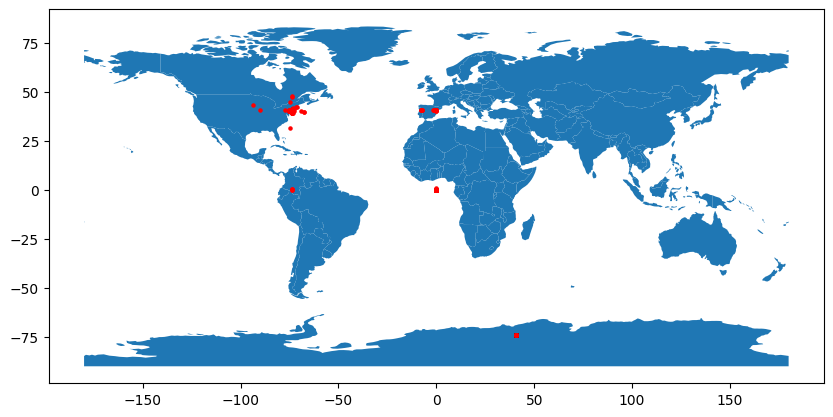

In [15]:
geometry = [Point(xy) for xy in zip(df["pickup_longitude"], df["pickup_latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

ax = world.plot(figsize=(10, 6))

gdf.plot(ax=ax, color="red", marker="o", markersize=5)

plt.show()

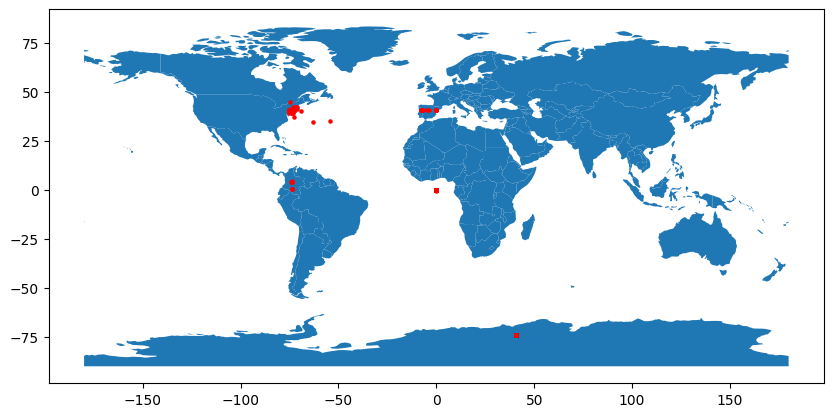

In [30]:
geometry = [Point(xy) for xy in zip(df["dropoff_longitude"], df["dropoff_latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

ax = world.plot(figsize=(10, 6))

gdf.plot(ax=ax, color="red", marker="o", markersize=5)

plt.show()

In [32]:
lat_min = 40.5774    
lat_max = 45.01      
lon_min = -74.2591   
lon_max = -73.7004  

tol = 0.5

df.drop(df[
    ~(
        (df["pickup_latitude"].between(lat_min - tol, lat_max + tol)) & 
        (df["pickup_longitude"].between(lon_min - tol, lon_max + tol)) & 
        (df["dropoff_latitude"].between(lat_min - tol, lat_max + tol)) & 
        (df["dropoff_longitude"].between(lon_min - tol, lon_max + tol))
    )
].index, inplace=True)

In [33]:
 holidays = holidays.US(years=year, state="NY")

df["holiday"] = df["pickup_datetime"].dt.date.isin(nyc_holidays.keys())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,hour,day,month,year,distance
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,Thursday,1,1,1,2009,1.793307
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,Thursday,2,1,1,2009,2.822604
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,Thursday,2,1,1,2009,1.606130
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,Thursday,2,1,1,2009,1.305003
5,5.0,2009-01-01 02:14:20+00:00,-73.986486,40.734734,-73.983508,40.730138,1,Thursday,2,1,1,2009,1.463030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199959,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,Tuesday,22,30,6,2015,1.139040
199960,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,Tuesday,23,30,6,2015,2.600064
199961,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,Tuesday,23,30,6,2015,2.458331
199962,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,Tuesday,23,30,6,2015,0.544917
